In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import random
from scipy.integrate import odeint
from scipy.stats import norm

In [10]:
S0 = 0.9998
C0 = 0.0002
E0 = 0.0004
I0 = 0.0002
H0 = 0
R0 = 0
D0 = 0
def seird(p=0.8,q=0.7,alpha=0.4,beta=0.2,gamma=0.08,lamda=0.03,theta=0.03,delta=0.02,tmax=150):
    N = S0 + R0 + I0
    t = np.linspace(0,tmax,tmax+1)
    def derive(y,t,p,q,alpha,beta,gamma,lamda,theta,delta):    
        S,C,E,I,H,R,D = y
        dSdt = (-alpha*S*I)/N
        dCdt = (alpha*S*I)/N 
        dEdt = (alpha*S*I)/N - (beta*E)
        dIdt = (beta*E) - (p*gamma*I) - (1-p)*lamda*I
        dHdt = (1-p)*lamda*I - (1-q)*delta*H - q*theta*H 
        dRdt = (p*gamma*I) + (q*theta*H)
        dDdt = (1-q)*delta*H    
        return dSdt,dCdt,dEdt,dIdt,dHdt,dRdt,dDdt
    
    y0 = S0,C0,E0,I0,H0,R0,D0
    ret = odeint(derive,y0,t,args=(p,q,alpha,beta,gamma,lamda,theta,delta))
    S,C,E,I,H,R,D  = ret.T
    temps = range(0,(tmax+1),1) 
    return t,S,C,E,I,H,R,D   
    
t,S,C,E,I,H,R,D = seird()

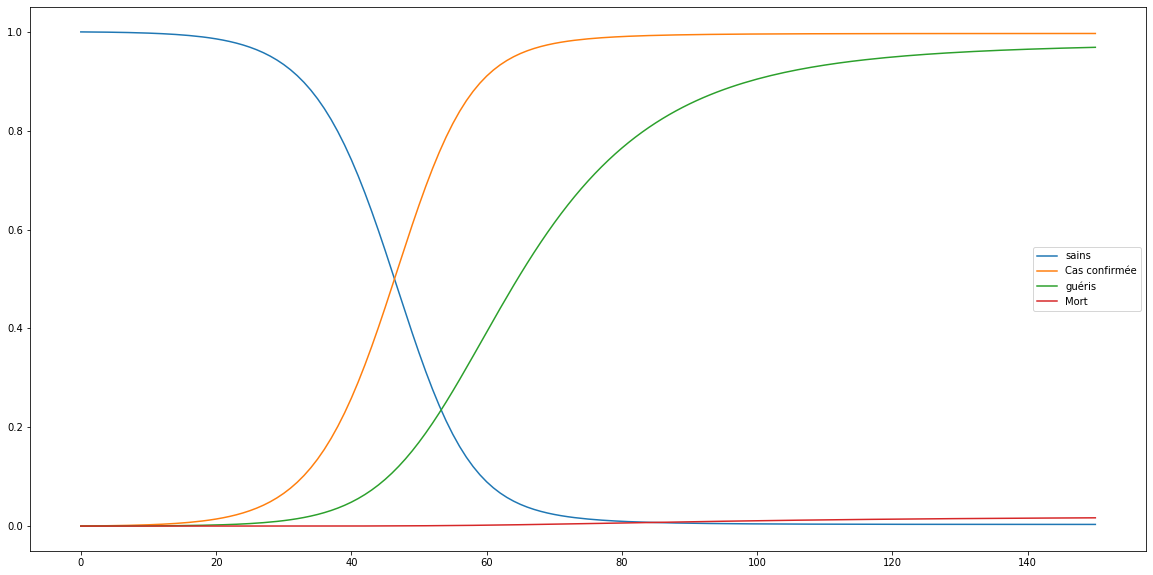

In [11]:
plt.figure(figsize=(20,10))
plt.plot(t,S,label='sains')
plt.plot(t,C,label='Cas confirmée')
plt.plot(t,R,label='guéris')
plt.plot(t,D,label='Mort')
plt.legend()

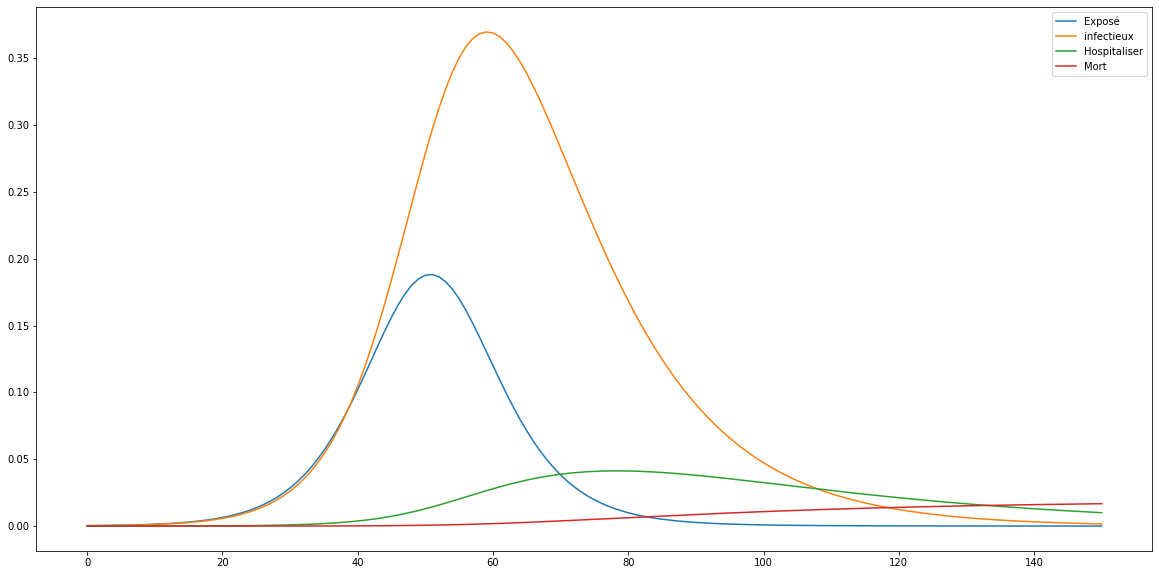

In [12]:
plt.figure(figsize=(20,10))
plt.plot(t,E,label='Exposé')
plt.plot(t,I,label='infectieux')
plt.plot(t,H,label='Hospitaliser')
plt.plot(t,D,label='Mort')
plt.legend()

In [13]:
def  brownian ( x0 , n ,  dt ,  delta):
    x = np.zeros((n))
    x[0] = x0
    # Iterate to compute the steps of the Brownian motion.
    for k in range(1,n):
        x[k] = x[k-1] + norm.rvs(scale=delta**2*dt)
    return x
def simulation_continue(p=0.7,q=0.7,N=100,beta=0.04,gamma=0.06,lamda=0.03,dt=0.01,theta=0.03,delta=0.02,temps=500,i0=0.2): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    E = np.zeros((temps))
    I = np.zeros((temps)) 
    H = np.zeros((temps)) 
    R = np.zeros((temps)) 
    D = np.zeros((temps)) 
    alpha = brownian(0.4,temps,0.1,0.25)
    
    S[0] = N - i0
    E[0] = 0
    I[0] = i0
    H[0] = 0
    R[0] = 0
    D[0] = 0
    t[0] = 0
    i = 0 
    
    while I[i] > 0 and i < (temps-1): 
        U1 = np.random.rand() 
        U2 = np.random.rand() 
        U3 = np.random.rand()
        U4 = np.random.rand()
        U5 = np.random.rand()
        a = (alpha[i]*S[i]*I[i]/N) + (beta*E[i]) + (p*gamma*I[i]) + ((1-p)*lamda*I[i])
        b = (p*gamma*I[i]) + ((1-p)*lamda*I[i])
        
        prob1 = (alpha[i]*I[i]*S[i]/N) / a
        prob2 = ((p*gamma*I[i]) + ((1-p)*lamda*I[i])) / a
        prob3 = (p*gamma*I[i]) / b
        h = - np.log(U1)/a
        t[i+1] = t[i] + h 
        
        if U2 <= prob1: 
            S[i+1] = S[i] - 1  
            E[i+1] = E[i] + 1
            I[i+1] = I[i]  
            R[i+1] = R[i]
            H[i+1] = H[i]  
            D[i+1] = D[i]
            
        else:                 
            S[i+1] = S[i]   
            E[i+1] = E[i] - 1 
            I[i+1] = I[i] + 1  
            R[i+1] = R[i]
            H[i+1] = H[i]  
            D[i+1] = D[i]

        if U3 <= prob2:
            S[i+1] = S[i]  
            E[i+1] = E[i] 
            I[i+1] = I[i] - 1 
            if U4 <= prob3:
                R[i+1] = R[i] + 1
                H[i+1] = H[i] 
            else:
                R[i+1] = R[i] 
                H[i+1] = H[i] + 1
        i += 1
        
    return t,S,E,I,R,H,D

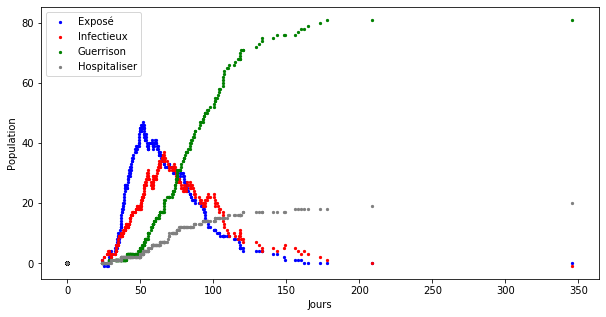

In [17]:
t,S,E,I,R,H,D = simulation_continue()
plt.figure(figsize=(10,5))
plt.scatter(t,E,c='blue',s=5,label='Exposé')
plt.scatter(t,I,c='red',s=5,label='Infectieux')
plt.scatter(t,R,c='green',s=5,label='Guerrison')
plt.scatter(t,H,c='grey',s=5,label='Hospitaliser')
plt.xlabel('Jours')
plt.ylabel('Population')
plt.legend()